In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [158]:
df=pd.read_csv("/content/Clean_dataset.csv")

In [159]:
df.head()

,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,1,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,45,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Feature Engineering**

In [160]:
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for col in replace_cols:
  df[col].replace({'No internet service': 'No' ,
                          'No phone service' : 'No'} , inplace=True)

In [161]:
def check_unique_count(data):
  feature_names=list(data.columns)
  binary_category=[]
  non_binary_category=[]
  categorical_col=[col for col in feature_names if data[col].dtypes=='object']
  for feature_name in categorical_col:
    number_of_unique_value=len(list(data[feature_name].unique()))
    if number_of_unique_value <= 2 :
      binary_category.append(feature_name)
    else:
      non_binary_category.append(feature_name)
  return binary_category,non_binary_category


In [162]:
binary_cat , non_binary_cat = check_unique_count(df)

In [163]:
binary_cat

['Partner',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'Churn']

In [164]:
non_binary_cat

['InternetService', 'Contract', 'PaymentMethod']

In [165]:
for col in non_binary_cat:
  print(col)
  print(df[col].nunique())
  print(df[col].unique())
  print("="*50)
  print('\n')

InternetService
3
['DSL' 'Fiber optic' 'No']


Contract
3
['Month-to-month' 'One year' 'Two year']


PaymentMethod
4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']




In [166]:
df.head()

,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
columns=list(df.columns)

In [168]:
numeric_features=[col for col in columns if df[col].dtypes!='object']
ordinal_features = ['Contract']
nominal_columns = [col for col in columns if df[col].dtypes=='object']

In [169]:
nominal_columns.remove('Contract')

In [170]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [171]:
ordinal_features

['Contract']

In [172]:
nominal_columns.pop()

'Churn'

In [173]:
nominal_columns

['Partner',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'PaymentMethod']

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [175]:
categories=['Month-to-month', 'One year', 'Two year']

In [176]:
numeric_pipeline=Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

ordinal_pipeline=Pipeline(
    steps=[
        ('imputer' , SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder' , OrdinalEncoder(categories=[categories]) )
    ]
)

nominal_pipeline=Pipeline(
    steps=[
        ('imputer' , SimpleImputer(strategy='most_frequent'))  ,
        ('onehot_encoder' , OneHotEncoder(handle_unknown='ignore' , drop='first'))
    ]
)

preprocessor=ColumnTransformer([
    ('numeric_pipline' , numeric_pipeline , numeric_features) ,
    ('ordinal_pipeline' , ordinal_pipeline , ordinal_features) ,
    ('nominal_pipeline' , nominal_pipeline , nominal_columns)
])



In [177]:
preprocessor

ColumnTransformer(transformers=[('numeric_pipline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('ordinal_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year']]))]),
                                 ['Contract']),
                                ('nominal_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Partner', 'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [178]:
X=df.iloc[: , :-1]
y=df.iloc[: , -1]

In [179]:
y=y.map({'No' : 0 , 'Yes' : 1})

In [180]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size=0.33 , random_state=101)

In [181]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(4718, 13) (4718,)
(2325, 13) (2325,)


In [182]:
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [183]:
X_train_scaled

array([[-1.1502822 ,  0.4712744 , -0.87398028, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.61547791,  0.7467722 ,  1.75636898, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19095515,  1.13413881, -0.87360371, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.1502822 ,  0.45791693, -0.85747774, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24942142,  1.42800313,  2.04151952, ...,  0.        ,
         1.        ,  0.        ],
       [-1.27230103, -1.4889342 , -0.99476998, ...,  1.        ,
         0.        ,  0.        ]])

In [184]:
X_test_scaled

array([[ 1.57480497,  1.19257774,  2.16820141, ...,  0.        ,
         1.        ,  0.        ],
       [-1.27230103, -0.63572586, -0.9834508 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.27230103, -1.5089704 , -0.9950358 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.61547791,  0.69167264,  1.75521713, ...,  1.        ,
         0.        ,  0.        ],
       [-0.82489866,  1.40128819, -0.44819269, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59865434,  0.75011157,  0.77611831, ...,  0.        ,
         1.        ,  0.        ]])

In [185]:
X_train=pd.DataFrame(X_train_scaled  , columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(X_test_scaled , columns=preprocessor.get_feature_names_out())

## **Machine Learning - Model Selection**


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier  , GradientBoostingClassifier

In [187]:
models={
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'SVC' : SVC(),
    'GaussianNB' : GaussianNB(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

In [188]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score , classification_report , confusion_matrix , roc_auc_score

In [189]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("="*50)


In [190]:
list(models.keys())[0
                    ]

'LogisticRegression'

In [191]:
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train , y_train)
  print(f"Model Trained : {list(models.keys())[i]}")
  y_pred=model.predict(X_test)
  evaluate_model(y_test , y_pred)

Model Trained : LogisticRegression
Accuracy: 0.8060215053763441
Precision: 0.6741803278688525
Recall: 0.5297906602254429
F1 Score: 0.5933273219116321
Confusion Matrix:
 [[1545  159]
 [ 292  329]]
Model Trained : DecisionTreeClassifier
Accuracy: 0.7131182795698925
Precision: 0.46394984326018807
Recall: 0.47665056360708535
F1 Score: 0.47021445591739475
Confusion Matrix:
 [[1362  342]
 [ 325  296]]
Model Trained : SVC
Accuracy: 0.7974193548387096
Precision: 0.6752336448598131
Recall: 0.46537842190016104
F1 Score: 0.5510009532888466
Confusion Matrix:
 [[1565  139]
 [ 332  289]]
Model Trained : GaussianNB
Accuracy: 0.7587096774193548
Precision: 0.5344036697247706
Recall: 0.750402576489533
F1 Score: 0.624246483590087
Confusion Matrix:
 [[1298  406]
 [ 155  466]]
Model Trained : RandomForestClassifier
Accuracy: 0.7823655913978494
Precision: 0.6263736263736264
Recall: 0.45893719806763283
F1 Score: 0.5297397769516728
Confusion Matrix:
 [[1534  170]
 [ 336  285]]
Model Trained : AdaBoostClassifi

## **Selecting Gradient Boosting Algorithm**

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}


In [194]:
gscv=GridSearchCV(GradientBoostingClassifier() , param_grid , cv=3 , verbose=3)

In [195]:
# gscv.fit(X_train , y_train)

In [196]:
# gscv.best_params_

In [197]:
# gscv.best_score_

In [198]:
model=GradientBoostingClassifier(learning_rate=0.05 , loss='exponential' , max_depth=5 , max_features='sqrt' , n_estimators=100)

In [199]:
model.fit(X_train_scaled , y_train)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=5,
                           max_features='sqrt')

In [200]:
y_pred=model.predict(X_test_scaled)

In [201]:
evaluate_model(y_test , y_pred)

Accuracy: 0.8004301075268817
Precision: 0.6659619450317125
Recall: 0.5072463768115942
F1 Score: 0.5758683729433273
Confusion Matrix:
 [[1546  158]
 [ 306  315]]


In [202]:
import pickle

with open('gradient_boosting_model.pkl' , 'wb') as file:
  pickle.dump(model, file)

## **PCA**

In [203]:
X_train.shape

(4718, 16)

In [204]:
from sklearn.decomposition import PCA

pca=PCA(n_components=16)

In [205]:
pca.fit_transform(X_train_scaled)

array([[-1.26189108,  1.5194979 , -0.24385751, ..., -0.03344998,
         0.03999087, -0.02401123],
       [ 3.0437647 , -0.8612472 ,  0.45480968, ...,  0.17104259,
        -0.30750512, -0.10486284],
       [-0.71235455,  1.96050628,  0.57601666, ...,  0.33339854,
         0.35933712, -0.18394735],
       ...,
       [-1.00676434,  1.4868661 , -0.10880678, ...,  0.09512763,
         0.17670364,  0.17782925],
       [ 2.9050611 ,  0.71264246, -0.84572806, ..., -0.275365  ,
        -0.12019624, -0.02902921],
       [-2.26206734, -0.4814509 , -0.25664295, ...,  0.07383278,
        -0.19076273, -0.04736044]])

In [206]:
pca.transform(X_test_scaled)

array([[ 3.34603048, -0.30186875,  0.00466234, ..., -0.07282311,
         0.04242322,  0.23503159],
       [-2.0436641 ,  0.32036419,  0.36242622, ..., -0.4226025 ,
        -0.20598128,  0.01173563],
       [-2.57704301, -0.59267455,  0.20341526, ...,  0.04378731,
        -0.08620777, -0.03634905],
       ...,
       [ 2.95341779, -0.94476229,  0.13448375, ..., -0.42006774,
        -0.09542679, -0.11815217],
       [ 0.0102174 ,  2.12503346, -0.02516191, ...,  0.19273232,
         0.30142468, -0.21149764],
       [ 1.07427877,  0.86938513, -0.89959226, ..., -0.12135613,
         0.109147  ,  0.0688455 ]])

In [207]:
pca.explained_variance_ratio_

array([0.43620751, 0.22249712, 0.05076332, 0.0375984 , 0.03489254,
       0.03340581, 0.03248735, 0.03000824, 0.0250875 , 0.02427164,
       0.02246452, 0.02041448, 0.01030861, 0.00841676, 0.00790865,
       0.00326755])

In [208]:
explained_variance=np.cumsum(pca.explained_variance_ratio_)

In [209]:
explained_variance

array([0.43620751, 0.65870463, 0.70946795, 0.74706635, 0.78195889,
       0.8153647 , 0.84785205, 0.87786029, 0.9029478 , 0.92721943,
       0.94968395, 0.97009843, 0.98040704, 0.9888238 , 0.99673245,
       1.        ])

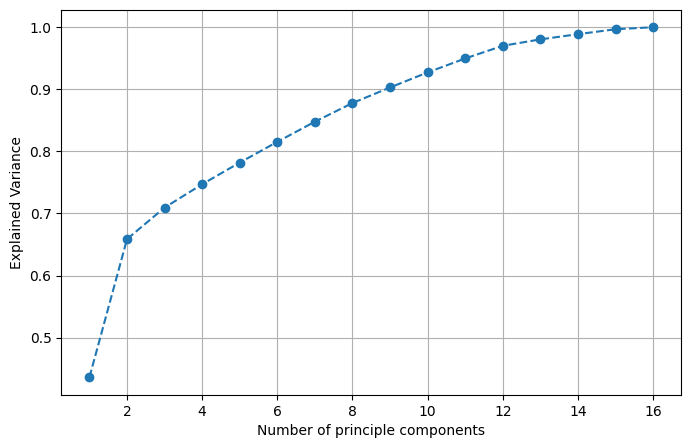

In [210]:
plt.figure(figsize=(8 , 5))
plt.plot(range(1 , len(explained_variance)+1) , explained_variance , marker='o' ,linestyle='--')
plt.xlabel('Number of principle components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

**10 components have capture 90%+ variance in the data**

In [211]:
pca=PCA(n_components=10)

In [212]:
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [213]:
model1=GradientBoostingClassifier(learning_rate=0.05 , loss='exponential' , max_depth=5 , max_features='sqrt' , n_estimators=100)

In [214]:
model1.fit(X_train_scaled , y_train)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=5,
                           max_features='sqrt')

In [215]:
y_pred=model1.predict(X_test_scaled)

In [216]:
evaluate_model(y_test , y_pred)

Accuracy: 0.8034408602150538
Precision: 0.674468085106383
Recall: 0.5104669887278583
F1 Score: 0.5811182401466545
Confusion Matrix:
 [[1551  153]
 [ 304  317]]


In [217]:
with open('/content/gradient_boosting_model.pkl' , 'rb') as file:
  model=pickle.load(file)

In [218]:
model

GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=5,
                           max_features='sqrt')

In [219]:
importance = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

In [220]:
feature_names

array(['numeric_pipline__tenure', 'numeric_pipline__MonthlyCharges',
       'numeric_pipline__TotalCharges', 'ordinal_pipeline__Contract',
       'nominal_pipeline__Partner_Yes',
       'nominal_pipeline__MultipleLines_Yes',
       'nominal_pipeline__InternetService_Fiber optic',
       'nominal_pipeline__InternetService_No',
       'nominal_pipeline__OnlineSecurity_Yes',
       'nominal_pipeline__OnlineBackup_Yes',
       'nominal_pipeline__DeviceProtection_Yes',
       'nominal_pipeline__TechSupport_Yes',
       'nominal_pipeline__PaperlessBilling_Yes',
       'nominal_pipeline__PaymentMethod_Credit card (automatic)',
       'nominal_pipeline__PaymentMethod_Electronic check',
       'nominal_pipeline__PaymentMethod_Mailed check'], dtype=object)

In [221]:
for i in range(len(importance)):
  importance[i]=importance[i]*100

In [222]:
importance

array([21.93272216, 12.51301346, 16.86785105, 12.65490725,  0.63209234,
        0.95871271, 12.51343488,  4.87386891,  1.27677016,  1.61756194,
        0.59310922,  2.01267718,  2.80552056,  0.64666048,  7.59131899,
        0.50977872])

In [223]:
data={
    'Feature' : feature_names,
    'Importance' : importance
}

In [224]:
importance_df=pd.DataFrame(data)
importance_df.sort_values(by='Importance' , ascending=False)

,Feature,Importance
0,numeric_pipline__tenure,21.932722
2,numeric_pipline__TotalCharges,16.867851
3,ordinal_pipeline__Contract,12.654907
6,nominal_pipeline__InternetService_Fiber optic,12.513435
1,numeric_pipline__MonthlyCharges,12.513013
14,nominal_pipeline__PaymentMethod_Electronic check,7.591319
7,nominal_pipeline__InternetService_No,4.873869
12,nominal_pipeline__PaperlessBilling_Yes,2.805521
11,nominal_pipeline__TechSupport_Yes,2.012677
9,nominal_pipeline__OnlineBackup_Yes,1.617562


In [225]:
pip install shap

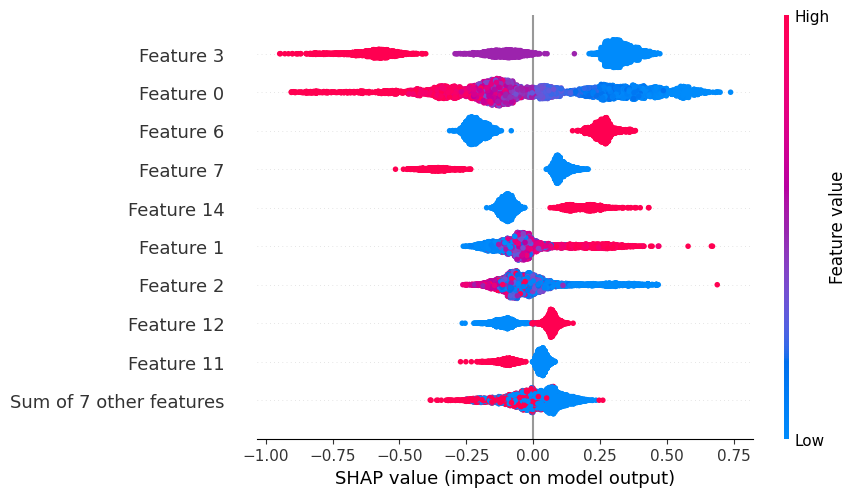

In [226]:
import shap
explainer=shap.TreeExplainer(model)
shap_values=explainer(X_train_scaled  , check_additivity=False)
shap.plots.beeswarm(shap_values)

Each dot = one data point (row/sample) in your dataset.

Y-axis (Feature X) = the top features ranked by their importance (Feature 3 is most impactful here).

X-axis (SHAP value) = how much that feature pushed the model’s prediction:

→ Right (positive) = pushed prediction toward class 1 (e.g., "Yes", "Positive")

← Left (negative) = pushed prediction toward class 0 (e.g., "No", "Negative")

Color of the dot = the actual value of that feature:

Red = high value

Blue = low value

🔍 Example:
Feature 3:

High values (red) push prediction to the left → more likely class 0.

Low values (blue) push prediction to the right → more likely class 1.

✅ So, Feature 3 is very important and inversely related to the target.

Feature 0:

Opposite pattern: High values (red) push to the right → more likely class 1.

In [227]:
explainer = shap.Explainer(model, X_train_scaled)

# Compute SHAP values
shap_values = explainer(X_train_scaled)

# Create a DataFrame with SHAP values and feature names
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

# Optional: View average absolute SHAP value per feature (importance)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)

# Display top features by importance
print(shap_importance)

 99%|===================| 4673/4718 [00:40<00:00]       

ordinal_pipeline__Contract                                 0.354599
numeric_pipline__tenure                                    0.260067
nominal_pipeline__InternetService_Fiber optic              0.230441
nominal_pipeline__InternetService_No                       0.170843
numeric_pipline__MonthlyCharges                            0.115121
nominal_pipeline__PaymentMethod_Electronic check           0.097085
numeric_pipline__TotalCharges                              0.095438
nominal_pipeline__PaperlessBilling_Yes                     0.074259
nominal_pipeline__TechSupport_Yes                          0.053996
nominal_pipeline__OnlineSecurity_Yes                       0.047043
nominal_pipeline__MultipleLines_Yes                        0.031538
nominal_pipeline__PaymentMethod_Mailed check               0.030149
nominal_pipeline__PaymentMethod_Credit card (automatic)    0.029101
nominal_pipeline__OnlineBackup_Yes                         0.022459
nominal_pipeline__Partner_Yes                   

In [228]:
with open('preprocessor.pkl'  , 'wb') as file:
  pickle.dump(preprocessor , file)

In [235]:
X_train_scaled.shape

(4718, 16)

In [238]:
X_train.columns

Index(['numeric_pipline__tenure', 'numeric_pipline__MonthlyCharges',
       'numeric_pipline__TotalCharges', 'ordinal_pipeline__Contract',
       'nominal_pipeline__Partner_Yes', 'nominal_pipeline__MultipleLines_Yes',
       'nominal_pipeline__InternetService_Fiber optic',
       'nominal_pipeline__InternetService_No',
       'nominal_pipeline__OnlineSecurity_Yes',
       'nominal_pipeline__OnlineBackup_Yes',
       'nominal_pipeline__DeviceProtection_Yes',
       'nominal_pipeline__TechSupport_Yes',
       'nominal_pipeline__PaperlessBilling_Yes',
       'nominal_pipeline__PaymentMethod_Credit card (automatic)',
       'nominal_pipeline__PaymentMethod_Electronic check',
       'nominal_pipeline__PaymentMethod_Mailed check'],
      dtype='object')

In [234]:
X.shape

(7043, 13)

In [231]:
X.columns

Index(['Partner', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [233]:
# features_to_drop=['OnlineBackup' , 'Partner' ,'DeviceProtection' ]